[Annotated notes](https://pwskills.notion.site/Annotated-Notes-10-fa6b3041ad3d4a3f9a2ca6102c175e12)\
[Notes with code](https://pwskills.notion.site/Class-Notes-10-590f79a6f7104a5e9463cf896d6de86a)

# Recursion (Continued)

**Question:** Given a number, we need to find sum of its digits using recursion.

**Examples:**
```
Input : 12345
Output : 15

Input : 45632
Output :20
```

**Solution:** First of all, to understand the difference between a number and a digit, $123$ is a number, and $1$, $2$, and $3$ are its digits. Now, how do we fetch a digit out of a number? We will use the `%` operator. Any number `% 10` gives the last digit of that number. For example
```
123 % 10 = 3
```
What about the other digits? If we want to get $2$ from $123$, we will somehow have to make the last digit as $2$. We can do this using integer division.
```
123 // 10 = 12
```
Therefore to get $2$, we can do
```
(123 // 10) % 10 = 2
```
Similarly, for the next digit, we can do
```
123 // 100 = 1
```
So, as a general formula, we can say that
$$\text{Getting the first digit of a number }m \text{ from the right} = m \% 10$$
$$\text{Removing the first digit from the right of a number }m = \left\lfloor \dfrac{m}{10} \right\rfloor$$
$$\text{Removing the first }n\text{ digits of a number }m\text{ from the right}=\left\lfloor \dfrac{m}{10^n} \right\rfloor$$
Combining the above three, we can say the following.
$$n^{\text{th}}\text{ digit of a number } m\text{ from the right} = \left\lfloor\dfrac{m}{10^n}\right\rfloor \% 10$$
So, we will keep removing the first digit from the end till we get $0$, which will be the base case. Have a look at the following example.

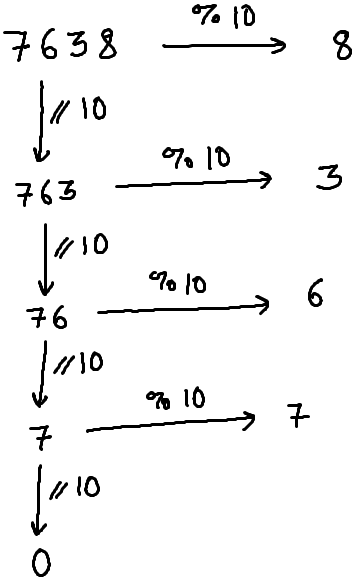

At the end, will add all the digits. But, how do we make the recursive call? Take the example of the number $N=123$. We can say the following.
$$\text{SumOfDigits}\left( 123 \right) = 3 + \text{SumOfDigits}\left( 12 \right)$$
Doing this over and over, we will get
$$\text{SumOfDigits}\left( 123 \right) = 3 + 2 + 1 + \text{SumOfDigits}\left( 0 \right)$$
Where, $\text{SumOfDigits}\left( 0 \right)$ is the base case, whose value is $0$.

For the time complexity, as usual, we have to check the number of times the function is recursively called. In this case, for a number $n$, it is $\mathcal{O}\left( \log_{10} n \right)$. Auxiliary space is $\mathcal{O}\left( \log_{10} n \right)$.

In [1]:
# My solution
def sum_of_digits(n: int):
    if n == 0:
        return 0
    else:
        return n % 10 + sum_of_digits(n // 10)

In [2]:
sum_of_digits(123)

6

In [3]:
sum_of_digits(12345)

15

In [4]:
sum_of_digits(45632)

20

**Question:** Given two numbers `a` and `b`, the task is to find the GCD of the two numbers.

*Note:* GCD (Greatest Common Divisor) or HCF (Highest Common Factor) of two numbers is the largest number that divides both of them.

Input: `a = 20`, `b = 28`.

Output: `4`.

Explanation: The factors of `20` are `1`, `2`, `4`, `5`, `10`, and `20`. The factors of `28` are `1`, `2`, `4`, `7`, `14`, and `28`. Among these factors, `1`, `2`, and `4` are the common factors of both `20` and `28`. The greatest among the common factors is `4`.

Input: `a = 60`, `b = 36`.

Output: `12`.

**Solution:**

There is a Euclidean algorithm to solve this problem. Let us take an example to find the GCD of $24$ and $16$. The algorithm first asks to subtract the smaller number from the larger number. In other words, $\text{GCD}\left( 24,16 \right)=\text{GCD}\left( 24-16,16 \right) = \text{GCD}\left( 8,16 \right)$. We repeat this. So, we get $\text{GCD}\left( 8,16 \right) = \text{GCD}\left( 8,16-8 \right) = \text{GCD}\left( 8, 8 \right)$. Further, $\text{GCD}\left( 8-8,8 \right) = \text{GCD}\left( 0,8 \right)$. Now, we know that the GCD of any number with $0$ is that number. In other words, $\text{GCD}\left( n, 0 \right) = n$. Hence, we get $\text{GCD}\left( 0,8 \right) = 8$.

In [5]:
# My solution
def gcd(a, b):
    if a == 0:
        return b
    if b == 0:
        return a
    if a == b:
        return a
    else:
        if a > b:
            return gcd(a - b, b)
        if b > a:
            return gcd(a, b - a)

In [6]:
gcd(20, 28)

4

In [7]:
gcd(24, 16)

8

In [8]:
gcd(10, 10)

10

In [9]:
gcd(10, 20)

10

In [10]:
gcd(15, 20)

5

Now, there is a better way to do this. If we have two numbers with a huge difference, e.g., $\text{GCD}\left( 100, 5 \right)$, we will have to keep subtracting $5$ from $100$, until we reach $\text{GCD}\left( 0, 5 \right)$. There is a better way to reach here. This is by doing $100\%5=0$.

In [11]:
def gcd(a, b):
    if b == 0:
        return a
    return gcd(b, a%b)

In [12]:
gcd(20, 24)

4

In [13]:
gcd(24, 20)

4

In [14]:
gcd(100, 5)

5

In [15]:
gcd(20, 28)

4

The time complexity for this is $\mathcal{O}\left( \log_2 n \right)$. This is because each number after `%` will at least become half of what it was earlier. Here, $n$ is $\min{\left(a, b\right)}$. As this is recursion, due to the recursive stacks, the auxiliary space will also be $\mathcal{O}\left( \log_2 n \right)$ with $n$ as $\min{\left(a, b\right)}$.

**Question:** Given an array of integers, print sums of all subsets in it. Output sums can be printed in any order.

**Example:**
```
Input : arr[] = {2, 3}
Output: 0 2 3 5

Input : arr[] = {2, 4, 5}
Output : 0 2 4 5 6 7 9 11
```

**Solution:**

Notice that each element in the set has exactly two options. It can either be present in the subset, or be absent. Let us take an example of the set `{1, 2, 3}`. Have a look at the following diagram.

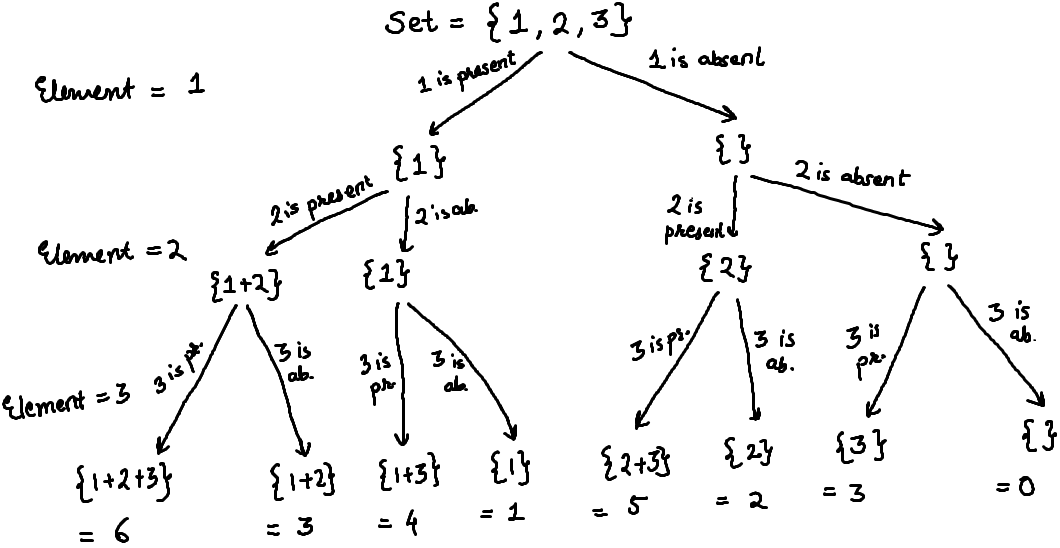

We started with the number at the `0`-th index, then the `1`-st index, till the end. We can see that we stop when we consider all the elements in the set. This is the base case. So, the depth of the tree is the same as the number of elements in the set. We will take two pointers, `l` and `r`. `l` will point at the first element, and interatively move across the set calculating the sum, `r` will keep pointing at the final element. We will stop when `l > r`.

In [16]:
def subsetSums(arr, l, r, sum=0):

	# Print current subset
	if l > r:
		print(sum, end=" ")
		return

	# Subset including arr[l]
	subsetSums(arr, l + 1, r, sum + arr[l])

	# Subset excluding arr[l]
	subsetSums(arr, l + 1, r, sum)

In [17]:
# Driver code
arr = [5, 4, 3]
n = len(arr)
subsetSums(arr, 0, n - 1)

12 9 8 5 7 4 3 0 